In [39]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from datetime import datetime, timedelta

In [40]:
superSales = pd.read_csv('payments_dataset.csv')
superSales['Order_date'] = pd.to_datetime(superSales['Order_date'])

/var/folders/yv/4mjtn9tx17x8js_bybzx9yqw0000gn/T/ipykernel_92180/3912823768.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



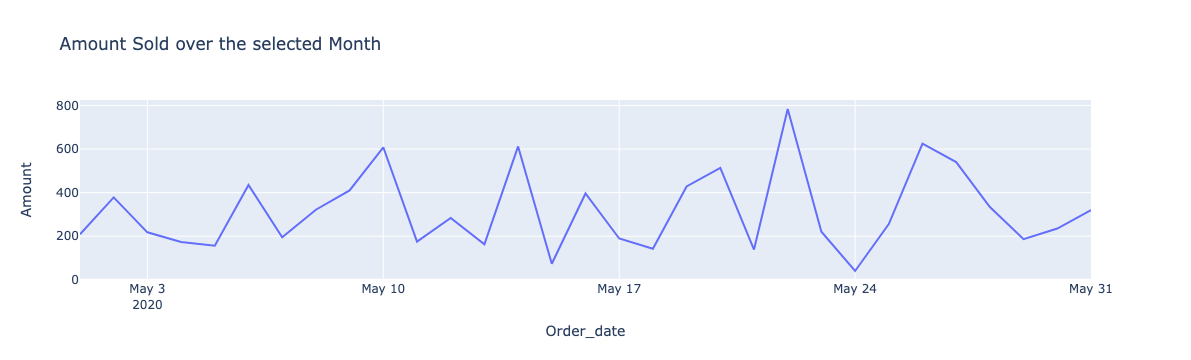

In [59]:
def get_amount_per_month(df, year, month, input_color_theme=None):
    chosen_year = df[df['Year'] == year]
    mar_data = (df['Order_date'].dt.month == month)
    lineQuantity = chosen_year[(mar_data)]

    # Quantity for each day
    quantity_per_day = lineQuantity.groupby('Order_date')['Amount'].sum().reset_index()

    # Create a line chart for Quantity over the last month using Plotly
    fig_quantity = px.line(
        quantity_per_day, 
        x='Order_date', 
        y='Amount', 
        title='Amount Sold over the selected Month'
    )
    fig_quantity.update_layout(
        margin_r=100,
    )
    return fig_quantity

get_amount_per_month(superSales, 2020, 5)

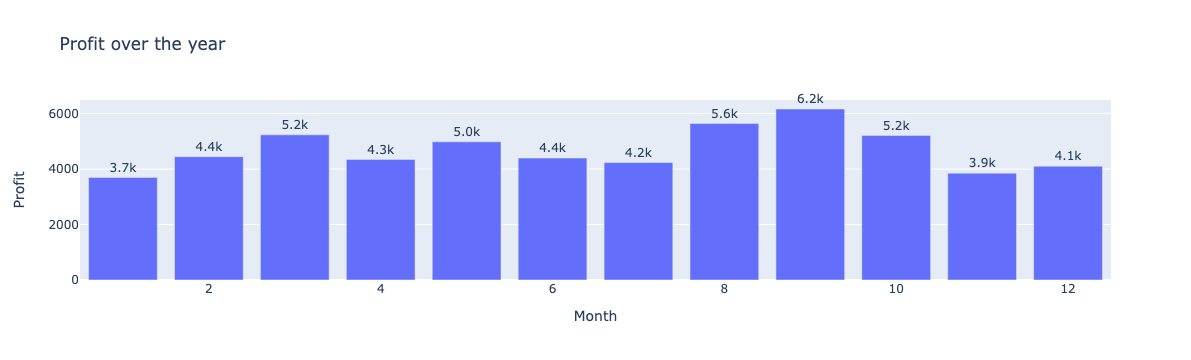

In [60]:
def get_profit_per_year(df, year):
    # Quantity for each day
    chosen_year = df[df['Year'] == year]
    amount_per_month = chosen_year.groupby('Month')['Profit'].sum().reset_index()

    # Create a line chart for Quantity over the last month using Plotly
    fig_quantity = px.bar(
        amount_per_month, 
        text_auto='.2s',
        x='Month', 
        y='Profit', 
        title='Profit over the year'
    )
    fig_quantity.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
    return fig_quantity
get_profit_per_year(superSales, 2020)

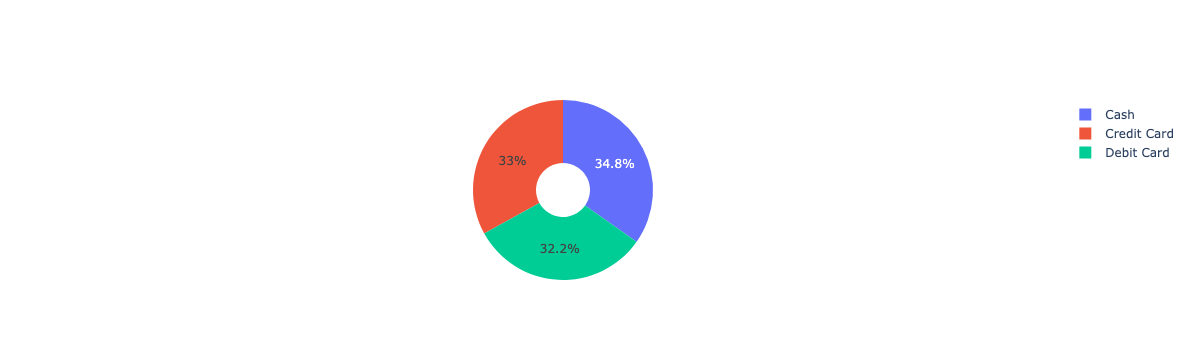

In [62]:
def percentage_per_paymentm(df, year):
    chosen_year = df[df['Year'] == year]
    values = chosen_year.groupby('PaymentMethod').count().iloc[:,0].values
    labels = chosen_year.groupby('PaymentMethod').count().index.tolist()

    fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
    # fig.show()
    return fig
    
percentage_per_paymentm(superSales, 2021)

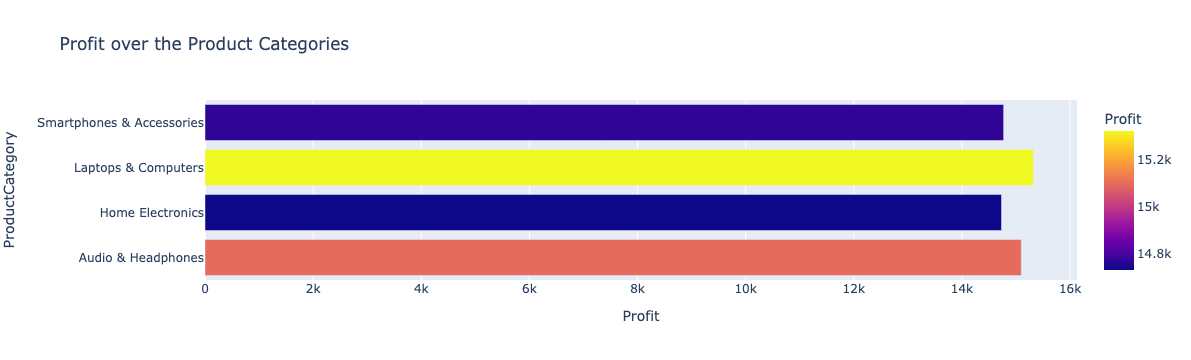

In [63]:
def get_profit_per_cat(df, year):
    chosen_year = df[df['Year'] == year]
    amount_per_month = chosen_year.groupby('ProductCategory')['Profit'].sum().reset_index()
    fig_quantity = px.bar(
        amount_per_month, 
        x='Profit', 
        y='ProductCategory', 
        orientation='h', 
        color='Profit',
        title='Profit over the Product Categories'
    )
    fig_quantity.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
    return fig_quantity
get_profit_per_cat(superSales, 2021)

In [112]:
camera_df = pd.read_csv('camera_dataset.csv')

In [76]:
camera_df = camera_df[camera_df['Year'] == 2021].reset_index(drop=True)
total_buyers = superSales[superSales['Year'] == 2021].shape[0]
total_visitors = camera_df.groupby('DetectionID')['NumPeople'].sum().sum()
conv_rate = round((total_buyers/total_visitors)*100,2)
print(total_buyers, total_visitors)
print(conv_rate)

1102 28309
3.89


In [48]:
def calculate_cr(input_df, input_year):
    camera_df = camera_df[camera_df['Year'] == 2021].reset_index(drop=True)
    total_buyers = superSales[superSales['Year'] == 2021].shape[0]
    total_visitors = camera_df.groupby('DetectionID')['NumPeople'].sum().sum()
    conv_rate = round((total_buyers/total_visitors)*100,2)

,ProductCategory,Profit
0,Audio & Headphones,15888.436968
1,Home Electronics,12479.739994
2,Laptops & Computers,15079.629295
3,Smartphones & Accessories,12862.416342


In [115]:
occ_year = camera_df.groupby(['Year', 'DetectionID'])['OccupationTime'].mean().reset_index()
occ_year = occ_year.groupby('Year')['OccupationTime'].mean().reset_index()
occ_year

,Year,OccupationTime
0,2020,7.219136
1,2021,6.880250
2,2022,6.994398
3,2023,7.039128


In [153]:
def get_agg(camera_df, superSales):
    # agregate by year
    people_per_year = camera_df.groupby(['Year', 'DetectionID'])['NumPeople'].sum().reset_index()
    total_people_per_year = people_per_year.groupby('Year')['NumPeople'].sum().reset_index()
    sales_per_year = superSales.groupby('Year')['TransactionID'].count().reset_index()
    occ_year = camera_df.groupby(['Year', 'DetectionID'])['OccupationTime'].mean().reset_index()
    occ_year = occ_year.groupby('Year')['OccupationTime'].mean().reset_index()
    df_year_agg = pd.merge(total_people_per_year, sales_per_year, on='Year')
    df_year_agg = pd.merge(df_year_agg, occ_year, on='Year')
    df_year_agg['ConversionRate'] = (df_year_agg['TransactionID']/df_year_agg['NumPeople'])*100
    df_year_agg['ConversionRate'] = df_year_agg['ConversionRate'].round(2)
    df_year_agg['OccupationTime'] = df_year_agg['OccupationTime'].round(2)
    df_year_agg = df_year_agg.rename(columns={'NumPeople':'Occupation', 'TransactionID':'Sells'})
    # agregate by month
    people_per_year = camera_df.groupby(['Year', 'Month','DetectionID'])['NumPeople'].sum().reset_index()
    total_people_per_year = people_per_year.groupby(['Year','Month'])['NumPeople'].sum().reset_index()
    sales_per_year = superSales.groupby(['Year','Month'])['TransactionID'].count().reset_index()
    occ_year = camera_df.groupby(['Year', 'Month', 'DetectionID'])['OccupationTime'].mean().reset_index()
    occ_year = occ_year.groupby(['Year', 'Month'])['OccupationTime'].mean().reset_index()
    df_month_agg = pd.merge(total_people_per_year, occ_year, on=['Year','Month'])
    df_month_agg = pd.merge(df_month_agg, sales_per_year, on=['Year','Month'])
    df_month_agg['ConversionRate'] = (df_month_agg['TransactionID']/df_month_agg['NumPeople'])*100
    df_month_agg['ConversionRate'] = df_month_agg['ConversionRate'].round(2)
    df_month_agg['OccupationTime'] = df_month_agg['OccupationTime'].round(2)
    df_month_agg = df_month_agg.rename(columns={'NumPeople':'Occupation', 'TransactionID':'Sells'})
    return df_year_agg, df_month_agg

def calculate_difference(input_df, year, col, month=None):
    if month:
        selected_data = input_df[(input_df['Year'] == year)&(input_df['Month'] == month)].reset_index()
        previous_data = input_df[(input_df['Year'] == year)&(input_df['Month'] == month-1)].reset_index()
        cols = ['Year','Month',col, 'difference']
    else:
        selected_data = input_df[(input_df['Year'] == year)].reset_index()
        previous_data = input_df[(input_df['Year'] == year-1)].reset_index()
        cols = ['Year',col, 'difference']
    selected_data['difference'] = selected_data[col].sub(previous_data[col], fill_value=0)
    return selected_data[cols]

In [154]:
df_year_agg, df_month_agg = get_agg(camera_df, superSales)

In [161]:
res = calculate_difference(df_month_agg, 2020, 'Occupation', month=2)
res['difference'].values[0]

-407

In [148]:
calculate_difference(df_year_agg, 2021, 'Occupation')

,Year,Occupation,difference
0,2021,30827,829


In [156]:
df_month_agg

,Year,Month,Occupation,OccupationTime,Sells,ConversionRate
0,2020,1,2463,7.43,91,3.69
1,2020,2,2056,7.46,85,4.13
2,2020,3,2751,6.88,109,3.96
3,2020,4,3401,7.30,83,2.44
4,2020,5,2807,7.37,84,2.99
5,2020,6,1919,7.30,80,4.17
6,2020,7,2362,7.11,97,4.11
7,2020,8,2294,7.16,103,4.49
8,2020,9,2627,7.30,102,3.88
9,2020,10,2588,7.33,99,3.83


In [138]:
def calculate_difference(input_df, year, col, month=None):
    if month:
        selected_data = input_df[(input_df['Year'] == year)&(input_df['Month'] == month)].reset_index()
        previous_data = input_df[(input_df['Year'] == year)&(input_df['Month'] == month-1)].reset_index()
        cols = ['Year','Month',col, 'difference']
    else:
        selected_data = input_df[(input_df['Year'] == year)].reset_index()
        previous_data = input_df[(input_df['Year'] == year-1)].reset_index()
        cols = ['Year',col, 'difference']
    selected_data['difference'] = selected_data[col].sub(previous_data[col], fill_value=0)
    return selected_data[cols]
    # return pd.concat([selected_year_data.Year, selected_year_data[col], selected_year_data.difference], 
                   # axis=1)
# calculate_difference(df_year_agg, 2020, 'Occupation')
res = calculate_difference(df_month_agg, 2020, 'Occupation', 2)

In [139]:
res/1000

,Year,Month,Occupation,difference
0,2.02,0.002,2.056,-0.407


In [135]:
superSales.ProductCategory.unique()

array(['Smartphones & Accessories', 'Home Electronics',
       'Audio & Headphones', 'Laptops & Computers'], dtype=object)

In [ ]:
section_cat = {'SectionA': ['Smartphones & Accessories'],
               'SectionB': [ 'Home Electronics','Audio & Headphones'],
               'SectionC': ['Laptops & Computers']}

In [136]:
# people_per_year = camera_df.groupby(['Year', 'Month','DetectionID'])['NumPeople'].sum().reset_index()
# total_people_per_year = people_per_year.groupby(['Year','Month'])['NumPeople'].sum().reset_index()

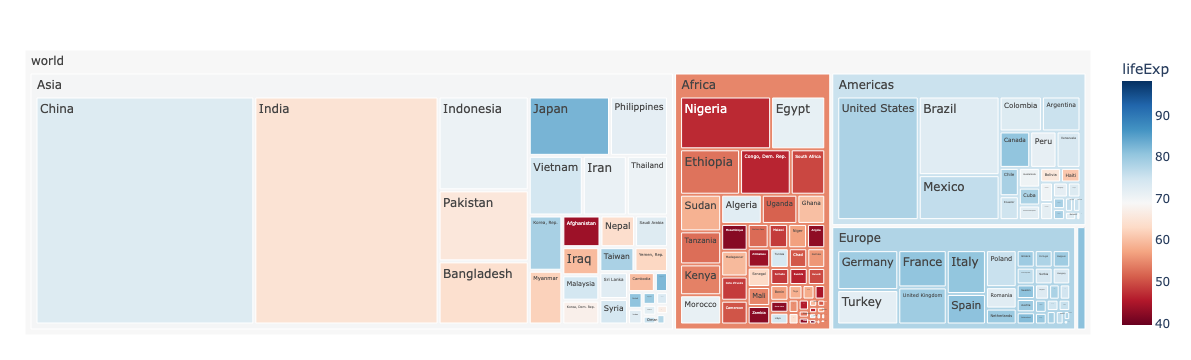

In [130]:
import plotly.express as px
import numpy as np
df = px.data.gapminder().query("year == 2007")
fig = px.treemap(df, path=[px.Constant("world"), 'continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

In [131]:
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894
